In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import cv2

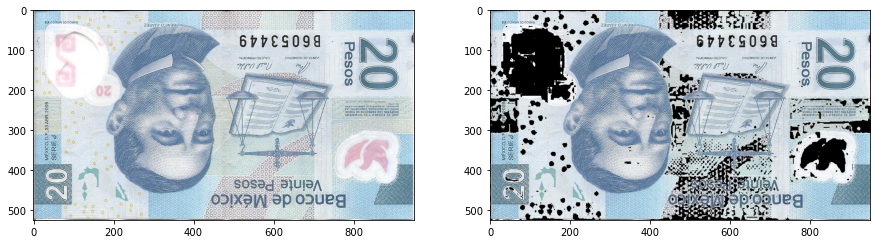

In [10]:
#colors
lower = np.array([80,0,0]) #Hue, saturation, value [https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/HSV_color_solid_cylinder.png/1200px-HSV_color_solid_cylinder.png]
upper = np.array([130,255,255]) 

imgn = cv2.imread('../datasets/20.jpg')

BGR_RGB = cv2.cvtColor(imgn, cv2.COLOR_BGR2RGB) #convertir color [viene en cv]
hsv = cv2.cvtColor(BGR_RGB,cv2.COLOR_RGB2HSV)
mask_range = cv2.inRange(hsv,lower,upper) #detectamos máscara (los que sí son azules los pone de blanco (sí cumplen))
img_mask = cv2.bitwise_and(BGR_RGB, BGR_RGB, mask=mask_range)
#print(mask_range)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(  BGR_RGB)
plt.subplot(1,2,2)
plt.imshow(img_mask) #colores detectados
plt.show()


(526, 1231)
[  0 255]


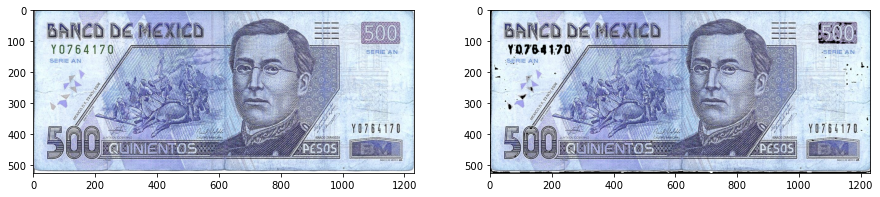

In [4]:
## nrows, ncols, nch = img.shape #nch = canales (RGB)
hsv = cv2.cvtColor(imgn,cv2.COLOR_RGB2HSV)
#RBG <-> HSV: https://www.peko-step.com/es/tool/hsvrgb.html
lower = np.array([90,0,0]) #Hue, saturation, value [https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/HSV_color_solid_cylinder.png/1200px-HSV_color_solid_cylinder.png]
upper = np.array([130,255,255]) 
mask_range = cv2.inRange(hsv,lower,upper) #detectamos máscara (los que sí son azules los pone de blanco (sí cumplen))
img_mask = cv2.bitwise_and(imgn, imgn, mask=mask_range)


print(mask_range.shape)
print(np.unique(mask_range))

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(imgn)
plt.subplot(1,2,2)
plt.imshow(img_mask) #colores detectados
plt.show()


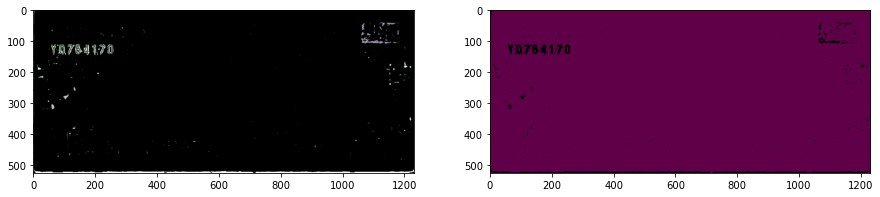

In [5]:

gray = cv2.cvtColor(imgn, cv2.COLOR_RGB2GRAY)########

#background
background = cv2.bitwise_and(imgn,imgn, mask= ~mask_range)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(background)

#Change color
shirtNew = np.zeros_like(img_mask)
shirtNew[:,:,0] = 95
shirtNew[:,:,1] = 0
shirtNew[:,:,2] = 73
# print("img: ", img.shape)
# print("shirtNew: ", shirtNew.shape)
newcolorMask = cv2.bitwise_and(shirtNew,shirtNew, mask= mask_range)
plt.subplot(1,2,2)
plt.imshow(newcolorMask)
plt.show()